In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, pacf, acf
from pylab import rcParams
import pymannkendall as mk
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('Solarize_Light2')

In [2]:
pip install pymannkendall

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Assign the file path to file
file = 'C:/Users/aadefabi001/Desktop/Untitled Folder/AirPassengers.csv'

In [4]:
# Reading the csv file into pandas DataFrame
df = pd.read_csv(file)

In [30]:
# View first 5 rows in the dataset
df.head()
# # View data description
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Passengers     144 non-null    int64  
 1   first_diff     143 non-null    float64
 2   seasonal_diff  132 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.5 KB


In [6]:
# Rename the column headers
df.rename(columns = {'Month':'Date','#Passengers':'Passengers'}, inplace = True)
df.columns # view column headers

Index(['Date', 'Passengers'], dtype='object')

In [7]:
# Change the data type of the month variable
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

Date          datetime64[ns]
Passengers             int64
dtype: object

In [8]:
# first row and last row
print('The first row :', df.iloc[0])
print('The last row :', df.iloc[-1])

The first row : Date          1949-01-01 00:00:00
Passengers                    112
Name: 0, dtype: object
The last row : Date          1960-12-01 00:00:00
Passengers                    432
Name: 143, dtype: object


In [9]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


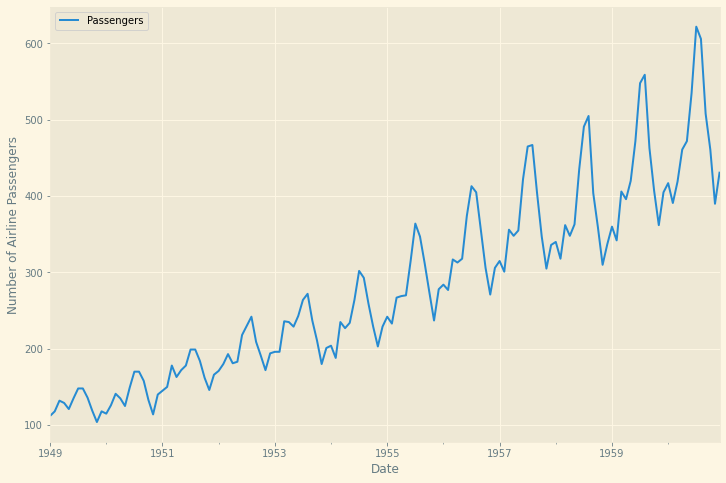

In [10]:
# Plotting our data trend
ax = df.set_index('Date').plot(figsize=(12, 8))
ax.set_ylabel('Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

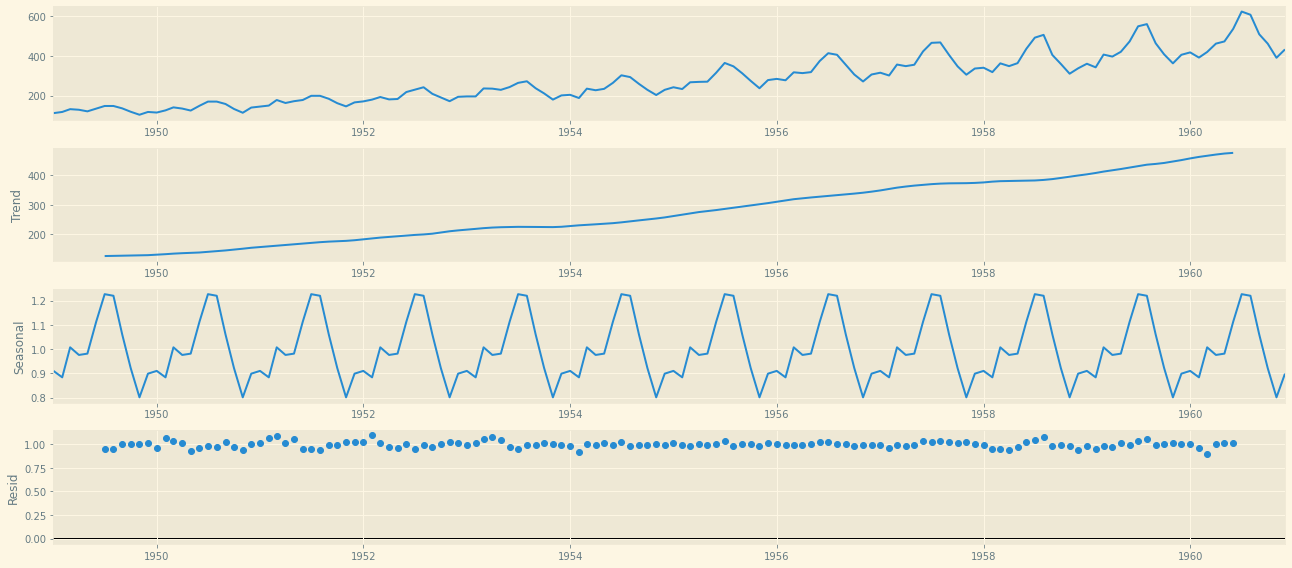

In [11]:
# Multiplicative Decompostion
extract= df.set_index('Date')
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(extract, model='multiplicative')
fig = decomposition.plot()
plt.show()

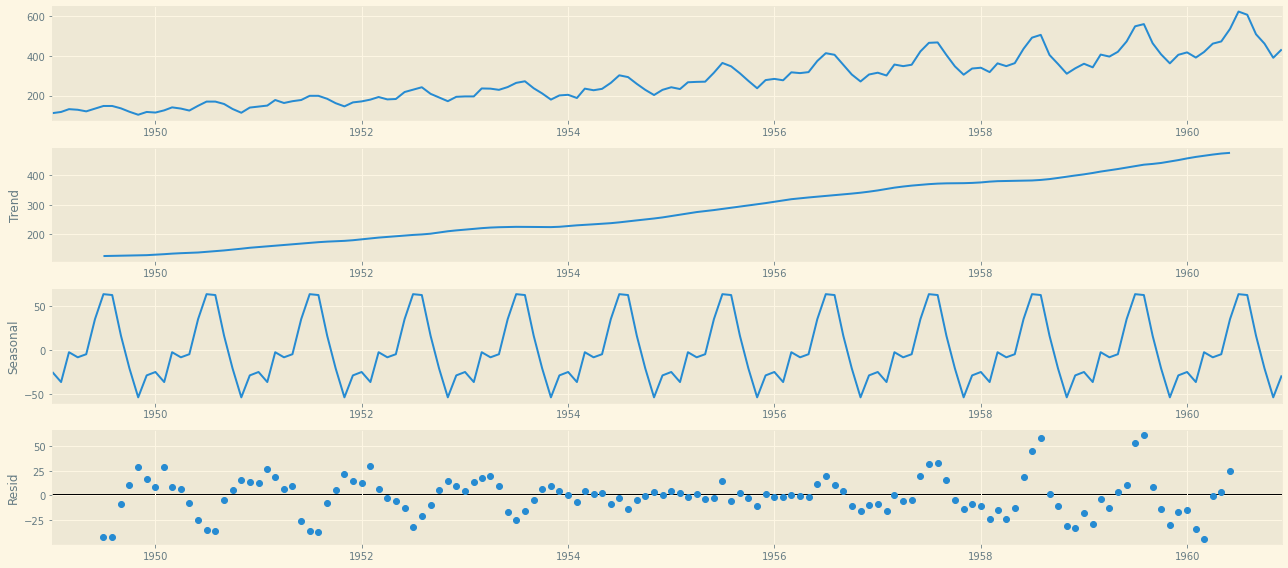

In [12]:
# plot addictive and compare
# Multiplicative Decompostion
extract= df.set_index('Date')
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(extract, model='addictive')
fig = decomposition.plot()
plt.show()

A time series is said to be “stationary” if it has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time.

One way to test whether a time series is stationary is to perform an augmented Dickey-Fuller test, which uses the following null and alternative hypotheses:

H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

HA: The time series is stationary.

If the p-value from the test is less than some significance level (e.g. α = .05), then we can reject the null hypothesis and conclude that the time series is stationary.

Reasons to convert a non-stationary series into stationary one before forecasting


There are reasons why we want to convert a non-stationary series into a stationary one. These are given below:

Forecasting a stationary series is relatively easy and the forecasts are more reliable.
An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

In [13]:
df = df.set_index("Date")
df.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
def plot_graph(timeseries):
    rolling_avg = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    original_data = plt.plot(timeseries, label="Original Data")
    mean = plt.plot(rolling_avg, label="Rolling Mean")
    std = plt.plot(rolling_std, label="Rolling Std")

    plt.legend(loc="best")
    plt.title("Time Series Data with rolling mean and std")
    plt.show

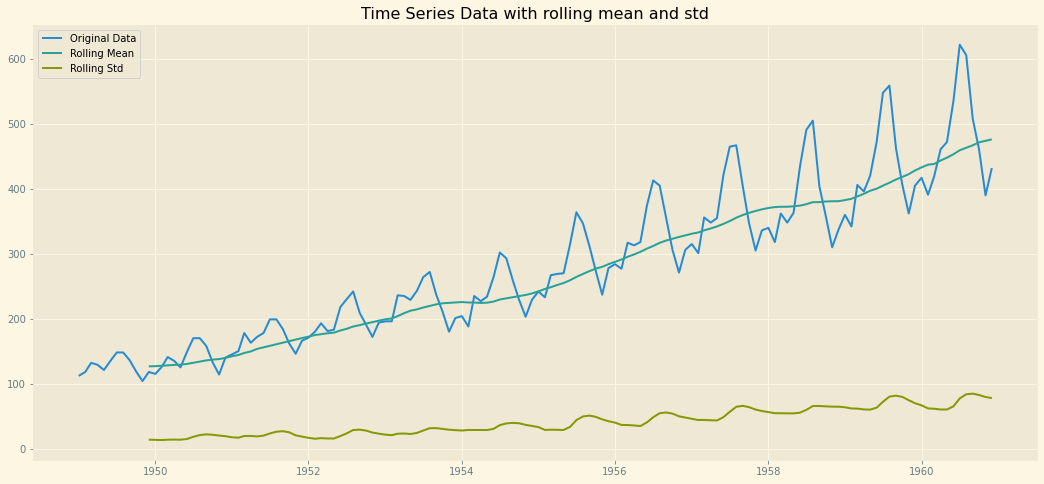

In [15]:
plot_graph(df)

In [16]:
# Perform augmented Dickey-Fuller test
# Ho : Data is not stationary
# H1 : Data is stationary
adfuller(df)

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
# Perform Mann-Kendall Trend Test - to check if there's a trend in the data
mk.original_test(df)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=14.381610025544802, Tau=0.8087606837606838, s=8327.0, var_s=335164.3333333333, slope=2.451216287678477, intercept=90.23803543098887)

### Differencing

Differencing refers to shifting position of the data.

In [19]:
# differencing of 1
df['first_diff'] = df.Passengers - df.Passengers.shift(1)

In [20]:
# differencing of 12
df['seasonal_diff'] = df.Passengers - df.Passengers.shift(12)

In [22]:
adfuller(df.seasonal_diff.dropna())

(-3.383020726492481,
 0.011551493085514952,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

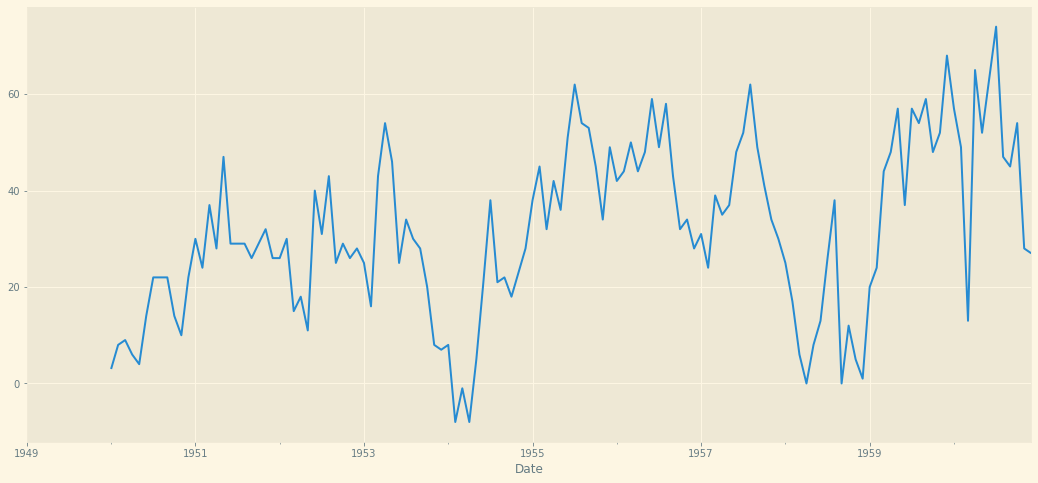

In [24]:
df.seasonal_diff.plot();

C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


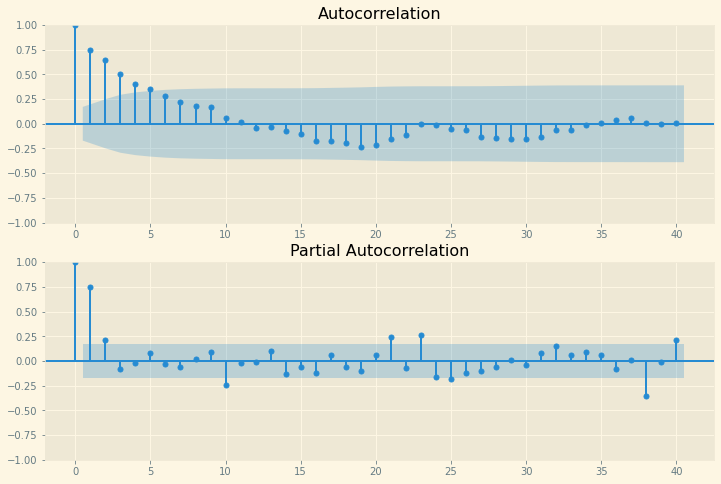

In [32]:
# plotting acf and pcf
fig = plt.figure(figsize =(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df.seasonal_diff.dropna(), lags = 40, ax= ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df.seasonal_diff.dropna(), lags = 40, ax= ax2)

In [37]:
# p =1, d =1, q = 9
model = ARIMA(df.Passengers, order =(1,1,1))
model_fit = model.fit()

C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Thu, 25 Aug 2022   AIC                           1401.852
Time:                        12:19:19   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
===================================================================================
Ljung-Box (L1) (Q):                   0.66   Jarque-Bera (JB):                 4.91
Prob(Q):                              0.42   Prob(JB):                         0.09
Heteroskedasticity (H):               8.35   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

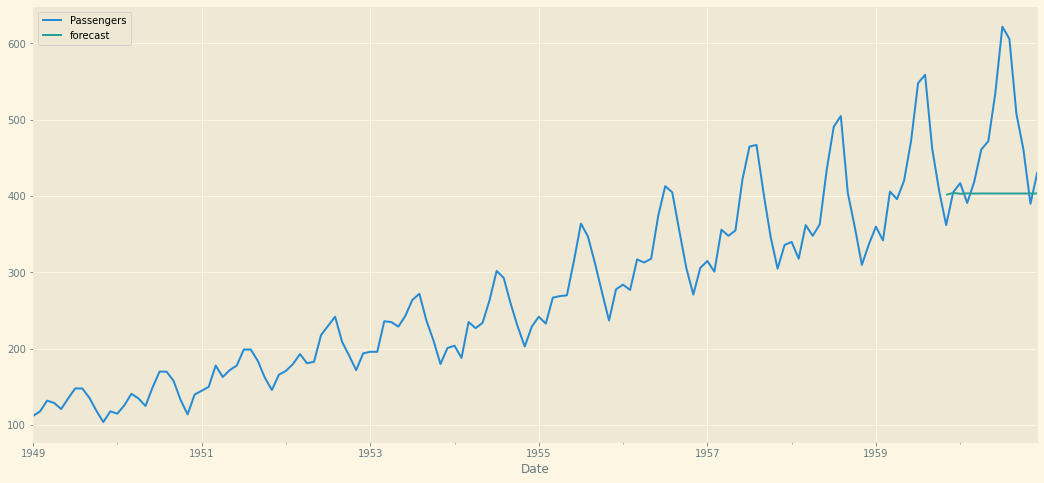

In [78]:
# Predicting forecast
df['forecast'] = model_fit.predict(start=130,end =143, dynamic =True)
df[['Passengers','forecast']].plot();

In [42]:
# USING SARIMAX
s_model = ARIMA(df.Passengers, order =(1,1,1), seasonal_order = (1,1,1,12))
s_model_fit = s_model.fit()

C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadefabi001\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


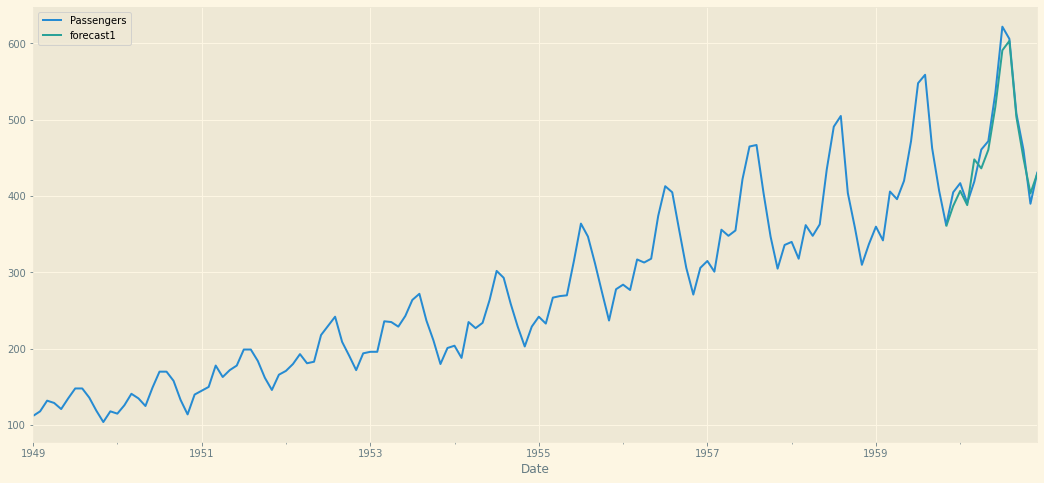

In [75]:
df['forecast1'] = s_model_fit.predict(start=130,end =143, dynamic=True)
df[['Passengers','forecast1']].plot();

In [63]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,36)]

In [64]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [94]:
future_datest_df.tail()

,Passengers,first_diff,seasonal_diff,forecast,forecast1
1963-07-01,NaN,NaN,NaN,NaN,NaN
1963-08-01,NaN,NaN,NaN,NaN,NaN
1963-09-01,NaN,NaN,NaN,NaN,NaN
1963-10-01,NaN,NaN,NaN,NaN,NaN
1963-11-01,NaN,NaN,NaN,NaN,NaN


In [93]:
future_df=pd.concat([df,future_datest_df])
future_df.loc['1960-12-1':]

,Passengers,first_diff,seasonal_diff,forecast,forecast1
1960-12-01,432,42.0,27.0,403.434507,430.307604
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN


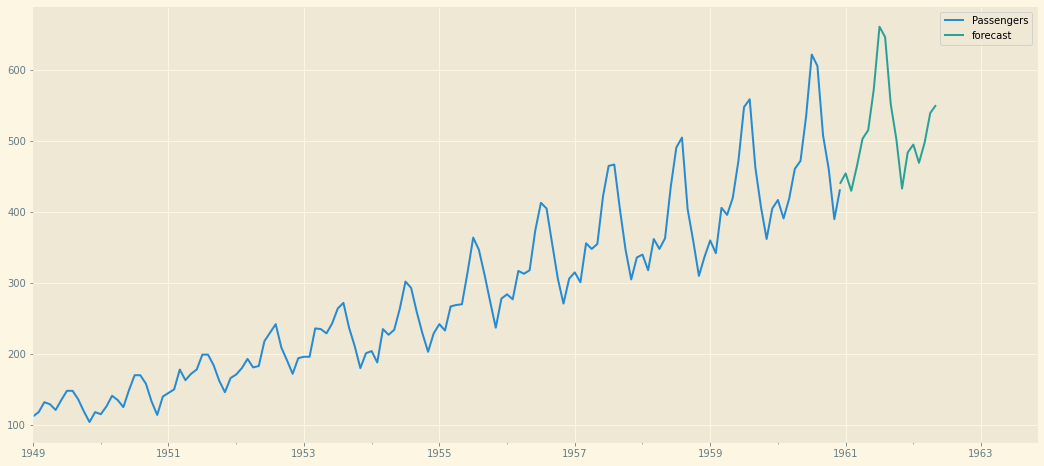

In [74]:
future_df['forecast'] = s_model_fit.predict(start = 143, end = 160, dynamic= True)  
future_df[['Passengers', 'forecast']].plot(); 

In [71]:
df.tail(40)

,Passengers,first_diff,seasonal_diff,forecast,forecast1
Date,,,,,
1957-09-01,404,-63.0,49.0,NaN,NaN
1957-10-01,347,-57.0,41.0,NaN,NaN
1957-11-01,305,-42.0,34.0,NaN,NaN
1957-12-01,336,31.0,30.0,NaN,NaN
1958-01-01,340,4.0,25.0,NaN,NaN
1958-02-01,318,-22.0,17.0,NaN,NaN
1958-03-01,362,44.0,6.0,NaN,NaN
1958-04-01,348,-14.0,0.0,NaN,NaN
1958-05-01,363,15.0,8.0,NaN,NaN
